In [129]:
import pandas as pd

In [131]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [133]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [135]:
list(df.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [137]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [139]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [141]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [143]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [145]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [147]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [149]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [151]:
###check for null values

In [153]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [155]:
###check for number of unique values in each column

In [157]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [159]:
###counting the number of values in each column

In [161]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [163]:
!pip install scikit-learn

In [164]:
###perform ordinal encoding for categorical data

In [165]:
from sklearn.preprocessing import OrdinalEncoder

In [166]:
encoder = OrdinalEncoder()
df["gender_encoded"] = encoder.fit_transform(df[["gender"]])

In [167]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0
1,female,group C,some college,standard,completed,69,90,88,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0
4,male,group C,some college,standard,none,76,78,75,1.0


In [168]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'gender_encoded'],
      dtype='object')

In [169]:
df["race/ethnicity_encoded"] = encoder.fit_transform(df[["race/ethnicity"]])
df["parental level of education_encoded"] = encoder.fit_transform(df[["parental level of education"]])
df["lunch_encoded"] = encoder.fit_transform(df[["lunch"]])
df["test preparation course_encoded"] = encoder.fit_transform(df[["test preparation course"]])

In [170]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'gender_encoded', 'race/ethnicity_encoded',
       'parental level of education_encoded', 'lunch_encoded',
       'test preparation course_encoded'],
      dtype='object')

In [171]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,1.0,1.0,1.0,1.0
1,female,group C,some college,standard,completed,69,90,88,0.0,2.0,4.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,1.0,3.0,1.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,1.0,2.0,4.0,1.0,1.0


In [229]:
###check for Ouliers in numerical columns (below 3 methods are there to check for outliers in the data)

In [173]:
# using IQR method for maths score
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound)
math_score_outliers = [value for value in df["math score"] if value < lower_bound or value > upper_bound]
math_score_outliers

[18, 0, 22, 24, 26, 19, 23, 8]

In [185]:
#using Z score for reading score
from scipy import stats
import numpy as np

df[np.abs(stats.zscore(df["reading score"]))>3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
59,female,group C,some high school,free/reduced,none,0,17,10,0.0,2.0,5.0,0.0,1.0
327,male,group A,some college,free/reduced,none,28,23,19,1.0,0.0,4.0,0.0,1.0
596,male,group B,high school,free/reduced,none,30,24,15,1.0,1.0,2.0,0.0,1.0
980,female,group B,high school,free/reduced,none,8,24,23,0.0,1.0,2.0,0.0,1.0


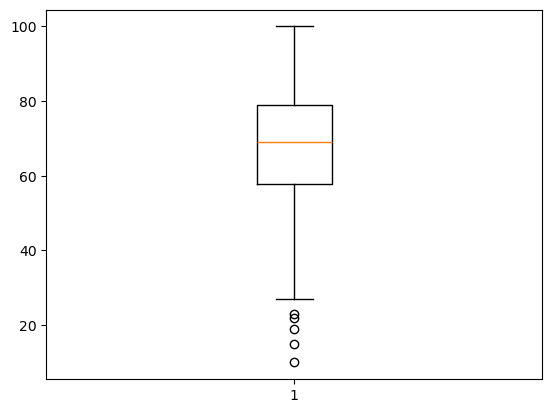

In [187]:
#using boxplot for writing score
import matplotlib.pyplot as plt

plt.boxplot(df["writing score"])
plt.show()

In [235]:
#check for passing marks for different subjects
#passing marks = max(highest/3, average/2)
sum_maths = 0
sum_writing = 0
sum_reading = 0
for i in range(0,len(df["math score"])):
    sum_maths = sum_maths + df["math score"][i]
    sum_writing = sum_writing + df["writing score"][i]
    sum_reading = sum_reading + df["reading score"][i]
avg_maths = sum_maths/len(df["math score"])
avg_writing = sum_writing/len(df["writing score"])
avg_reading = sum_reading/len(df["reading score"])

passing_marks_math = max(max(df["math score"])/3, avg_maths/2)
passing_marks_writing = max(max(df["writing score"])/3, avg_writing/2)
passing_marks_reading = max(max(df["reading score"])/3, avg_reading/2)

print(passing_marks_math, passing_marks_writing, passing_marks_reading)

33.333333333333336 34.027 34.5845


In [189]:
###perform feature engineering

In [237]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,1.0,1.0,1.0,1.0
1,female,group C,some college,standard,completed,69,90,88,0.0,2.0,4.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,1.0,3.0,1.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,1.0,2.0,4.0,1.0,1.0


In [281]:
# 1. Mutual Information - (for naths score)
X = df[["gender_encoded","race/ethnicity_encoded","parental level of education_encoded","lunch_encoded","test preparation course_encoded"]]
y = df[["math score"]]
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X,y,discrete_features=True)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns).sort_values(ascending = False)
mi_scores

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lunch_encoded                          0.064838
parental level of education_encoded    0.031140
test preparation course_encoded        0.010875
race/ethnicity_encoded                 0.007965
gender_encoded                         0.000000
Name: MI Scores, dtype: float64

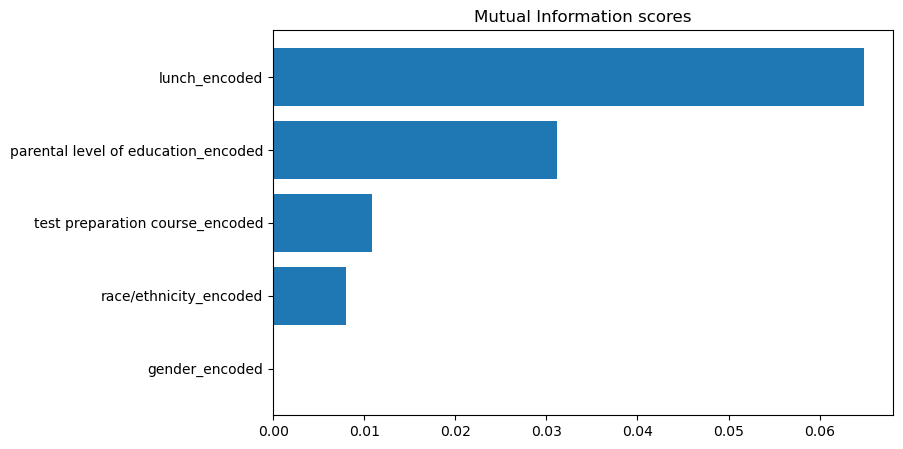

In [283]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information scores")

plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

In [289]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,1.0,1.0,1.0,1.0
1,female,group C,some college,standard,completed,69,90,88,0.0,2.0,4.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,1.0,3.0,1.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,1.0,2.0,4.0,1.0,1.0


In [291]:
###model training

In [297]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.1/101.7 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.2/101.7 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.3/101.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.3/101.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.4/101.7 MB 1.5 MB/s eta 0:01:10
   ---------------------------------------- 0.5/101.7 MB 1.5 MB/s eta 0:01:09
   ---------------------------------------- 0.5/101.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.6/101.7 MB 1.4 MB/s eta 0:01:15
   ---------------------------------------- 0.6/101.7 MB 1.2 MB/s eta 0:01:21
   ----

In [301]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:18
   ---------------------------------------- 0.1/124.9 MB 722.1 kB/s eta 0:02:53
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:53
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.4/124.9 MB 984.2 kB/s eta 0:02:07
   ---------------------------------------- 0.5/124.9 MB 984.6 kB/s eta 0:02:07
   ---------------------------------------- 0.5/124.9 MB 1.0 MB/s et

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [305]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,1.0,1.0,1.0,1.0
1,female,group C,some college,standard,completed,69,90,88,0.0,2.0,4.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,1.0,3.0,1.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,1.0,2.0,4.0,1.0,1.0


In [307]:
X = df[["reading score","writing score","gender_encoded","race/ethnicity_encoded","parental level of education_encoded","lunch_encoded","test preparation course_encoded"]]
y = df["math score"]

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [313]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [315]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4471
- Mean Absolute Error: 5.0925
- R2 Score: 0.8156
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3197
- Mean Absolute Error: 4.9832
- R2 Score: 0.8359


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5878
- Mean Absolute Error: 4.4942
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3195
- Mean Absolute Error: 4.1310
- R2 Score: 0.8837


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.1768
- Mean Absolute Error: 5.7588
- R2 Score: 0.7715
-----------------------

In [317]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.883803
2,Ridge,0.883713
8,AdaBoost Regressor,0.850249
5,Random Forest Regressor,0.847584
7,CatBoosting Regressor,0.847238
1,Lasso,0.835870
6,XGBRegressor,0.824385
4,Decision Tree,0.741512
3,K-Neighbors Regressor,0.662020


In [319]:
###using linear regression

In [321]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.38


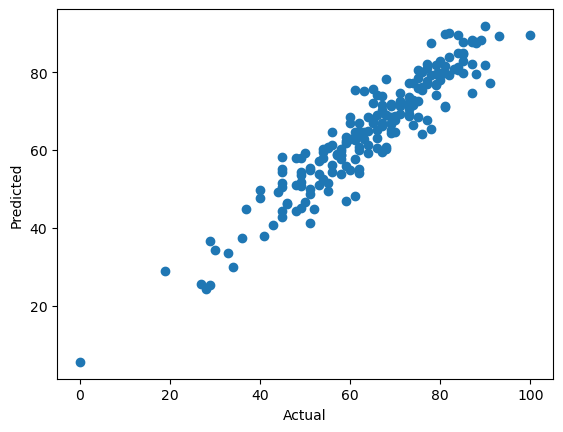

In [323]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

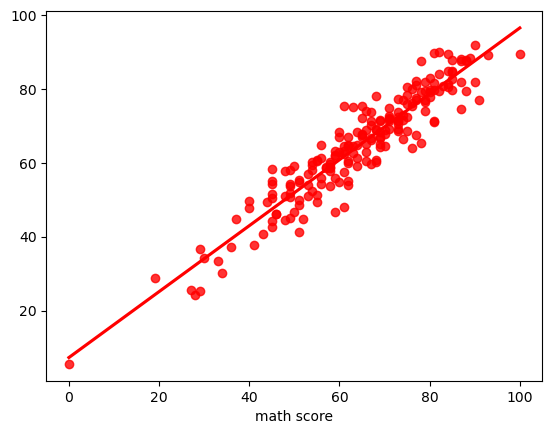

In [325]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [327]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred},index)
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852


In [359]:
pred_df = pred_df.reset_index(drop=True)

In [361]:
pred_df["Difference"]

0      13.881443
1      -4.073580
2       0.642332
3      -3.150932
4      -0.912837
         ...    
195     7.096352
196     2.073466
197     7.470808
198    -2.953852
199    -3.618533
Name: Difference, Length: 200, dtype: float64

In [365]:
sum = 0
for i in range(0,200):
    sum+=pred_df["Difference"][i]

average_diff = sum/200


In [367]:
print(average_diff)

-0.39795594729821887
